In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
#add train.csv's path from your own device below
data = pd.read_csv('/Users/jaym9000/Desktop/Programming/unb-projects/neural-network/train.csv')

In [15]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_train = data[1000:m].T
Y_train = data_dev[0]
X_train = data_dev[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [17]:
#X_train[:, 0].shape
Y_train

array([4, 3, 2, 7, 2, 1, 1, 2, 2, 5, 2, 1, 1, 3, 3, 2, 3, 1, 6, 8, 8, 4,
       2, 0, 3, 7, 1, 0, 0, 0, 3, 9, 4, 9, 0, 7, 4, 3, 3, 7, 9, 0, 6, 4,
       0, 8, 7, 3, 5, 5, 8, 5, 2, 9, 5, 6, 0, 9, 3, 4, 9, 9, 6, 0, 0, 0,
       5, 7, 2, 6, 2, 4, 0, 1, 7, 5, 4, 2, 3, 9, 8, 0, 9, 5, 1, 1, 2, 2,
       8, 7, 5, 0, 1, 0, 5, 7, 7, 2, 5, 7, 0, 2, 9, 2, 0, 6, 3, 7, 1, 5,
       0, 1, 5, 0, 2, 0, 0, 9, 0, 9, 6, 9, 4, 5, 9, 5, 2, 2, 1, 5, 5, 7,
       7, 9, 2, 0, 4, 6, 1, 5, 4, 3, 4, 1, 1, 2, 1, 4, 8, 8, 9, 1, 7, 9,
       8, 9, 2, 4, 4, 1, 3, 5, 1, 6, 5, 2, 0, 5, 9, 5, 5, 3, 4, 7, 9, 5,
       1, 1, 8, 9, 5, 5, 5, 4, 3, 2, 9, 9, 4, 8, 3, 8, 1, 4, 3, 4, 5, 5,
       1, 0, 1, 4, 7, 0, 2, 1, 3, 9, 6, 9, 1, 4, 4, 8, 2, 2, 7, 0, 2, 9,
       2, 1, 6, 9, 5, 8, 3, 3, 2, 5, 1, 2, 3, 2, 5, 0, 4, 9, 8, 8, 1, 7,
       6, 8, 0, 3, 2, 9, 8, 0, 4, 5, 0, 7, 2, 4, 7, 9, 6, 8, 8, 0, 5, 5,
       4, 7, 7, 6, 1, 1, 6, 8, 2, 2, 9, 2, 2, 8, 5, 2, 0, 8, 9, 0, 7, 6,
       3, 0, 8, 1, 1, 9, 8, 5, 4, 2, 4, 1, 5, 9, 0,

In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z>0
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, db2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(get_predictions(A2), Y))
        return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[1 6 0 3 4 6 1 0 4 1 9 1 5 1 1 5 5 7 1 0 5 1 2 0 5 6 9 5 0 1 0 1 1 0 4 1 3
 5 1 0 4 8 1 5 0 5 5 5 3 6 1 2 5 1 5 1 1 1 1 1 1 1 5 7 7 5 5 5 0 7 0 1 2 0
 5 6 5 1 0 1 1 4 1 3 5 2 0 4 5 5 5 4 2 5 4 0 1 0 6 6 5 5 3 7 1 4 9 9 7 3 0
 8 5 0 0 8 0 1 5 1 1 3 1 2 3 6 0 9 2 6 5 5 6 0 5 1 5 5 5 9 1 5 1 0 0 5 7 1
 0 5 1 4 4 0 9 1 5 5 5 5 3 0 9 4 4 4 9 0 1 0 0 5 1 3 0 5 7 7 1 1 0 9 4 4 5
 1 7 0 9 5 5 0 4 1 5 8 1 1 0 7 7 1 1 7 4 2 9 3 5 1 7 5 8 0 4 2 1 4 4 6 9 0
 0 3 1 9 1 7 0 1 1 0 5 4 5 4 5 1 8 1 2 0 4 1 5 3 0 1 4 0 4 5 1 2 9 5 0 0 5
 0 1 2 1 6 0 1 5 1 2 5 1 1 0 4 5 5 9 0 5 0 7 0 1 3 1 1 5 1 9 1 5 1 4 0 9 5
 8 0 6 7 1 5 4 0 0 0 5 1 1 0 1 0 5 5 1 0 5 7 4 9 1 6 5 0 7 5 2 5 5 5 2 4 5
 5 5 1 1 1 0 7 5 3 5 0 1 5 1 0 4 0 0 1 5 3 1 1 5 1 3 5 0 5 0 8 2 0 1 0 9 5
 2 0 0 1 7 7 4 1 5 7 1 7 4 1 1 5 0 1 3 0 1 4 5 4 1 4 5 4 5 1 4 5 5 7 5 5 5
 1 0 3 4 4 1 7 0 0 2 5 5 5 5 0 5 3 1 5 1 0 0 5 1 5 1 5 1 0 1 0 5 5 1 4 6 5
 5 0 5 1 1 5 5 4 1 9 1 5 0 1 1 5 0 4 2 4 9 5 5 7 8 1 5 1 5 1 4 5 5 5 0 1 8
 7 5 5 3 1 

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  4


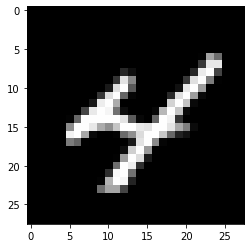

Prediction:  [6]
Label:  3


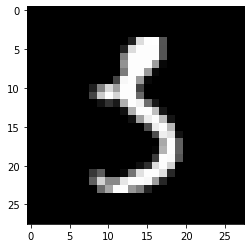

Prediction:  [6]
Label:  2


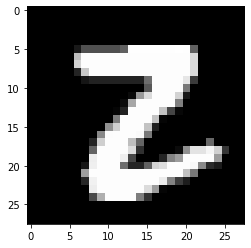

Prediction:  [3]
Label:  7


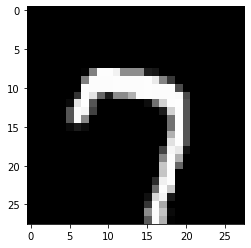

Prediction:  [4]
Label:  2


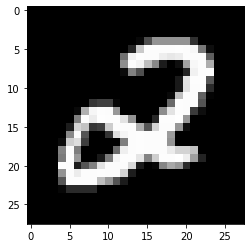

Prediction:  [6]
Label:  1


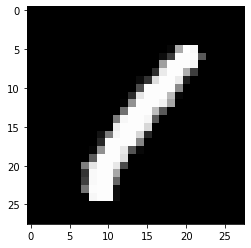

Prediction:  [1]
Label:  1


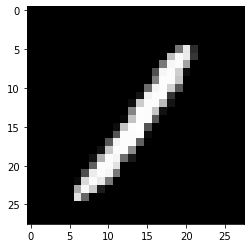

Prediction:  [9]
Label:  2


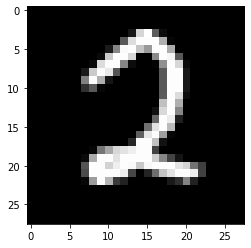

Prediction:  [4]
Label:  2


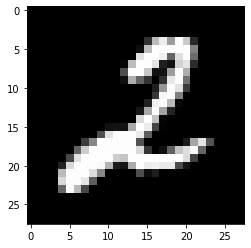

Prediction:  [5]
Label:  5


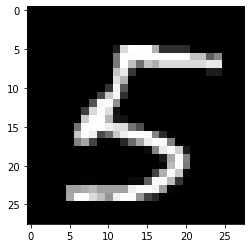

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)